Tugas Kelompok PBA

In [ ]:
!pip install datasets

     |████████████████████████████████| 290 kB 4.1 MB/s 
     |████████████████████████████████| 132 kB 46.7 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 243 kB 40.6 MB/s 
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 192 kB 45.5 MB/s 
     |████████████████████████████████| 271 kB 46.0 MB/s 
     |████████████████████████████████| 160 kB 43.7 MB/s 


In [ ]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

Downloading:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = dataset.data["train"].to_pandas()
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis:


In [ ]:
unuse = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']

feats_df = df.drop(columns = unuse)

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Cleaning Data

In [ ]:
import re
def clean_text(text):
    # menghapus backslash dan apostrophe 
    text = re.sub("\'", "", text) 
    # menghapus semua karakter selain alfabet
    text = re.sub("[^a-zA-Z]"," ",text) 
    # menghapus whitespaces 
    text = ' '.join(text.split()) 
    # mengubah teks ke lowercase
    text = text.lower() 
    
    return text

In [ ]:
feats_df['text'] = feats_df['text'].apply(lambda x: clean_text(x))

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,that game hurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,sexuality shouldn t be a grouping category it ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,you do right if you dont care then fuck em,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,man i love reddit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,name was nowhere near them he was by the falcon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Visualisasi Frekuensi Kata

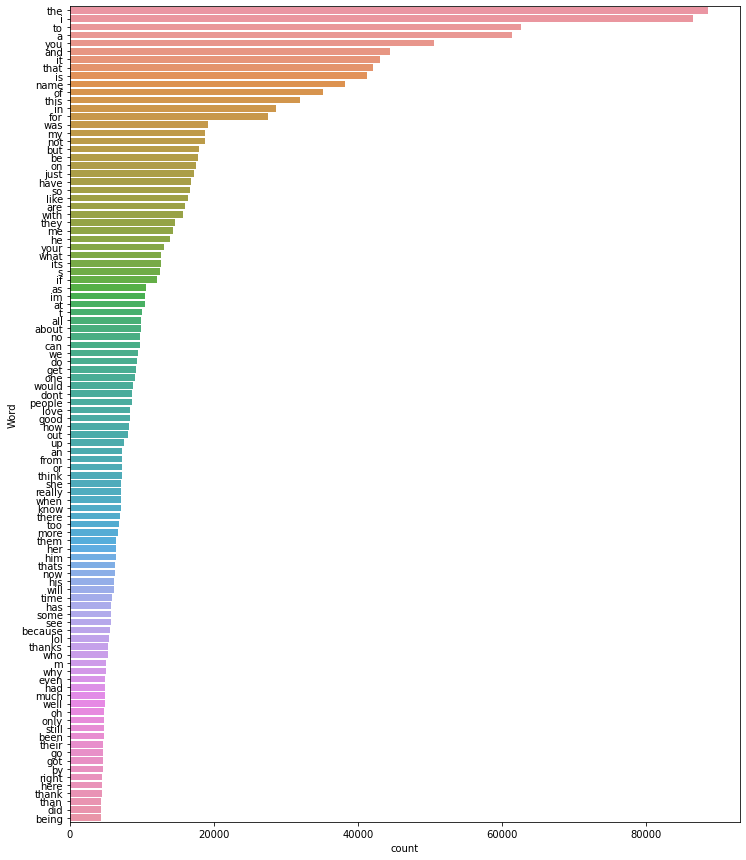

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # memilih top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualisasi masing-masing kata dan frekuensi nya
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(feats_df['text'], 100)

## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

feats_df['text'] = feats_df['text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,game hurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,sexuality grouping category makes different ot...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,right dont care fuck em,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,man love reddit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,name nowhere near falcon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


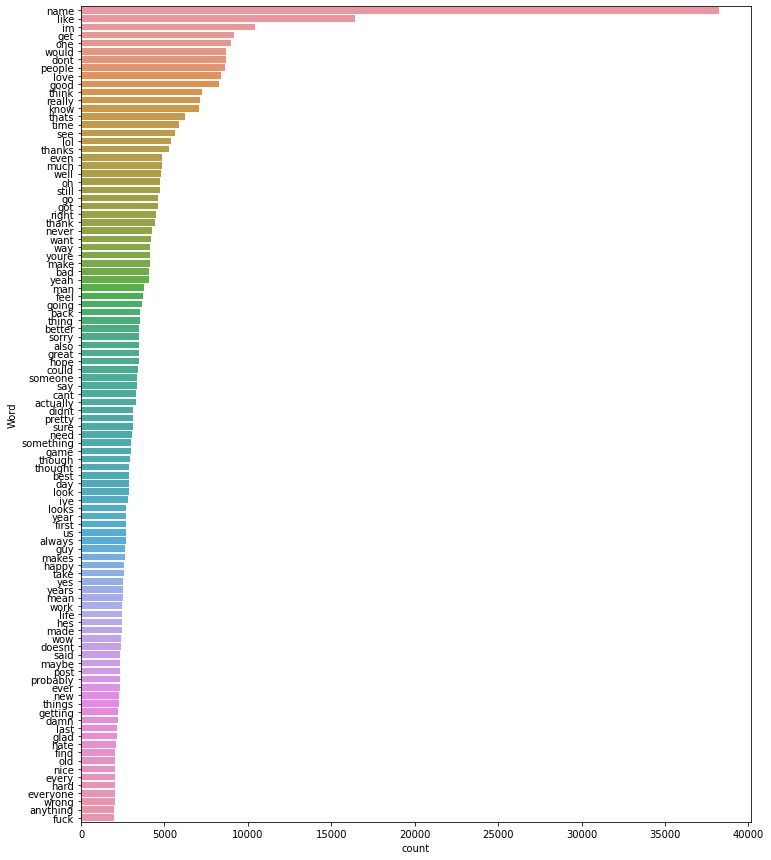

In [ ]:
freq_words(feats_df['text'], 100)

## Tokenization

In [ ]:
from nltk.tokenize import SpaceTokenizer
from nltk.tokenize import word_tokenize

words = []

for i in range(0, feats_df['text'].size):
  sTokenizer = SpaceTokenizer()
  words.append(sTokenizer.tokenize(feats_df['text'][i]))

## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

for i in range(0, len(words)):
  print(words[i])

  for w in words[i]:
    print(w, " : ", ps.stem(w))

Output streaming akan dipotong hingga 5000 baris terakhir.
still  :  still
think  :  think
thinking  :  think
ridiculous  :  ridicul
['hard', 'respect', 'organization', 'hear', 'shit', 'like', 'struggle', 'franchise', 'win', 'another', 'ws', 'anytime', 'soon']
hard  :  hard
respect  :  respect
organization  :  organ
hear  :  hear
shit  :  shit
like  :  like
struggle  :  struggl
franchise  :  franchis
win  :  win
another  :  anoth
ws  :  ws
anytime  :  anytim
soon  :  soon
['aw', 'crap', 'parents', 'age', 'edit', 'life']
aw  :  aw
crap  :  crap
parents  :  parent
age  :  age
edit  :  edit
life  :  life
['nvm', 'took', 'whole', 'seconds', 'realize', 'la', 'schools', 'probs', 'dont', 'built', 'snow', 'days']
nvm  :  nvm
took  :  took
whole  :  whole
seconds  :  second
realize  :  realiz
la  :  la
schools  :  school
probs  :  prob
dont  :  dont
built  :  built
snow  :  snow
days  :  day
['courageous', 'man', 'helped', 'distressed', 'wild', 'animal', 'rip', 'shreds', 'good', 'job', 'sir']
c

KeyboardInterrupt: ignored

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import numpy as np

X = feats_df["text"]
y = np.asarray(feats_df[feats_df.columns[1:]])

In [ ]:
X

0                                                 game hurt
1         sexuality grouping category makes different ot...
2                                   right dont care fuck em
3                                           man love reddit
4                                  name nowhere near falcon
                                ...                        
211220                                  everyone likes name
211221         well imported gazillion country gets serious
211222                                        looks amazing
211223    fda plenty criticize like usually criticized h...
211224     desktop link r helperbot downvote remove counter
Name: text, Length: 211225, dtype: object

In [ ]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
vetorizar = TfidfVectorizer(max_features=3000, max_df=0.85)
vetorizar.fit(X)

TfidfVectorizer(max_df=0.85, max_features=3000)

## 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.2 MB/s 


## Naive Bayes Classification 

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train_tfidf, y_train)


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])